# Nearest Neighbour Classifier for Handwritten Digits

In this notebook, we will build a KNN classifier that takes an image of a handwritten digit and outputs a label 0-9. We will use 

## 1 MNIST Data Set
We will use MNIST, a classic machine learning dataset, consisting of 28x28 grayscale images of handwritten digits. The original training set contains 60,000 examples, and the test set contains 10,000 examples. In this notebook, we will be working with a subset of this data: a training set of 7,500 examples and a test set of 1,000 examples.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [24]:
# Loading Training Data
train_data = np.load("C:/Users/itsrh/Desktop/ML Model Datasets/MNIST/train_data.npy")
train_labels = np.load('C:/Users/itsrh/Desktop/ML Model Datasets/MNIST/train_labels.npy')

# Loading Training Data
test_data = np.load("C:/Users/itsrh/Desktop/ML Model Datasets/MNIST/test_data.npy")
test_labels = np.load('C:/Users/itsrh/Desktop/ML Model Datasets/MNIST/test_labels.npy')

In [25]:
# Printing Dimension of Training and Testing Data
print(f'Training Data Dimension: {np.shape(train_data)}')
print(f'Number of Training Labels: {len(train_labels)}')
print(f'Testing Data Dimension: {np.shape(test_data)}')
print(f'Number of Testing Labels: {len(test_labels)}')

Training Data Dimension: (7500, 784)
Number of Training Labels: 7500
Testing Data Dimension: (1000, 784)
Number of Testing Labels: 1000


In [29]:
# Printing no of examples of each digit.
train_digits, train_count = np.unique(train_labels, return_counts = True)
print('Training Data Distribution')
print(dict(zip(train_digits,train_count)))

test_digits, test_count = np.unique(test_labels, return_counts = True)
print('Test Data Distribution')
print(dict(zip(test_digits, test_count)))

Training Data Distribution
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Test Data Distribution
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


## 2. Visualizing the data
Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to a 28x28 image.

In [39]:
# Define a function that displays a digit given in its vector form
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape(28,28), cmap = plt.cm.gray)
    plt.show()
    return

# Define a function that takes the index of a particular data set, "test" or "train", and displays that image.
def vis_image(index, data_set = 'train'):
    if data_set == 'train':
        show_digit(train_data[index])
        label = train_labels[index]
    else:
        show_digit(test_data[index])
        label = test_labels[index]
    print(f'Label: {label}')
    return

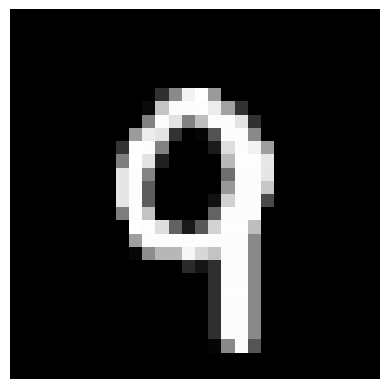

Label: 9


In [41]:
# view the first data point of the training data
vis_image(0)

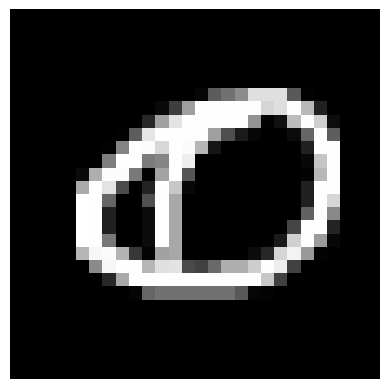

Label: 0


In [36]:
# view the first data point of the test data
vis_image(0, 'test')

## 3. Squared Euclidean distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

Now we just need to be able to compute squared Euclidean distance. The following function does so.

In [44]:
# Function to compute squared Euclidean distance between two vectors.
def squared_dist(x,y):
    return np.sum(np.square(x-y))

## Compute distance between a seven and a one in our training set.
print("Distance from 7 to 1: ", squared_dist(train_data[4],train_data[5]))

## Compute distance between a seven and a two in our training set.
print("Distance from 7 to 2: ", squared_dist(train_data[4],train_data[1]))

## Compute distance between two seven's in our training set.
print("Distance from 7 to 7: ", squared_dist(train_data[4],train_data[7]))

Distance from 7 to 1:  5357193.0
Distance from 7 to 2:  12451684.0
Distance from 7 to 7:  5223403.0


## 4. Computing nearest neighbors

Now that we have a distance function defined, we can now turn to nearest neighbor classification. 

In [50]:
# Function that takes a vector x, and returns the index of its nearest neighbour in the training data.
def find_NN(x):
    distance = []
    for i in train_data:
        distance.append(squared_dist(x,i))
    return np.argmin(distance)

# Function that takes a vector x, and returns the class of its nearest neighbour.
def NN_classifier(x):
    index = find_NN(x)
    return train_labels[index]

A Success Case.
NN Clasification: 0
True Label: 0
True Image of Test Data


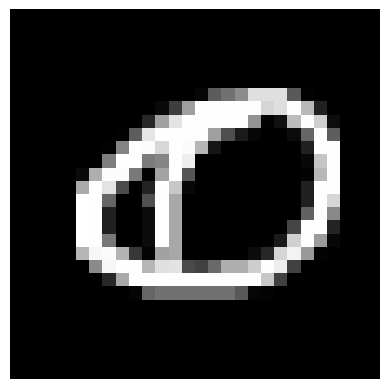

Label: 0
Image of Nearest Neibhour


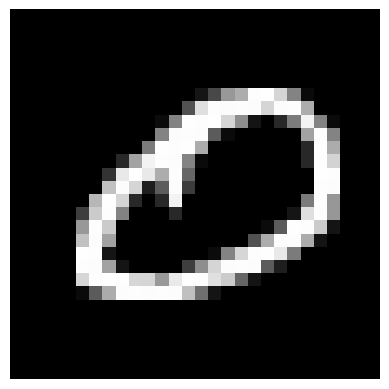

Label: 0


In [55]:
# A Success Case:
print('A Success Case.')
print('NN Clasification:',NN_classifier(test_data[0]))
print('True Label:',test_labels[0])
print('True Image of Test Data')
vis_image(0, 'test')
print('Image of Nearest Neibhour')
vis_image(find_NN(test_data[0]))

A Failure Case.
NN Clasification: 2
True Label: 3
True Image of Test Data


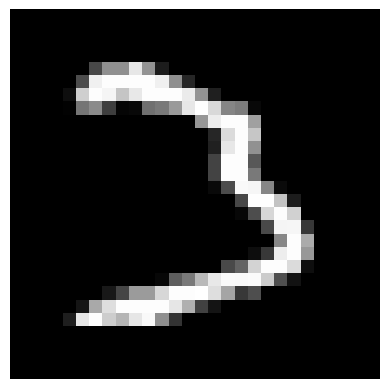

Label: 3
Image of Nearest Neibhour


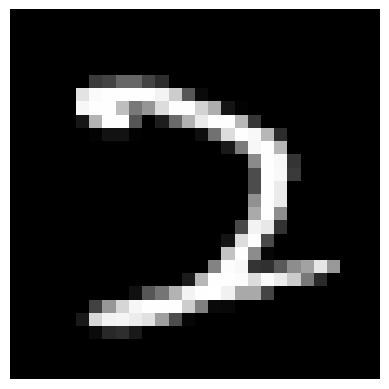

Label: 2


In [56]:
# A Failure Case:
print('A Failure Case.')
print('NN Clasification:',NN_classifier(test_data[39]))
print('True Label:',test_labels[39])
print('True Image of Test Data')
vis_image(39, 'test')
print('Image of Nearest Neibhour')
vis_image(find_NN(test_data[39]))

Classification of Test Digit 100.
NN Clasification: 8
True Label: 8
True Image of Test Data


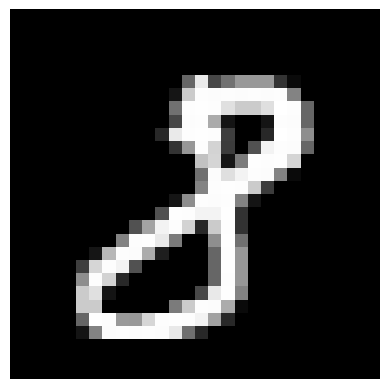

Label: 8
Image of Nearest Neibhour


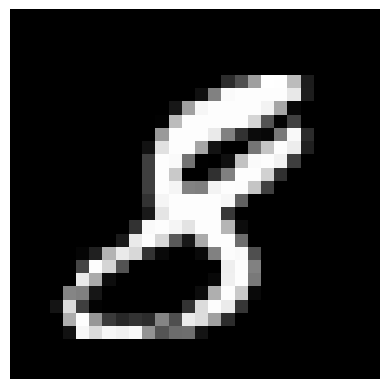

Label: 8


In [57]:
# Classification of Test Digit 100
print('Classification of Test Digit 100.')
print('NN Clasification:',NN_classifier(test_data[99]))
print('True Label:',test_labels[99])
print('True Image of Test Data')
vis_image(99, 'test')
print('Image of Nearest Neibhour')
vis_image(find_NN(test_data[99]))

## 6. Processing the full test set

Now let's apply our nearest neighbour classifier over the full data set, and calculate the time it takes to complete the process.


In [61]:
t1 = time.time()
test_predictions = [NN_classifier(i) for i in test_data]
num_error = np.not_equal(test_predictions,test_labels)
error = np.sum(num_error)/len(test_labels)
t2 = time.time()
print('Error of NN Classifier: ',error)
print('Classification time (seconds)',t2-t1)

Error of NN Classifier:  0.046
Classification time (seconds) 163.21283268928528
